# Preparation
## Install depedencies

In [1]:
!pip install -r ../requirements.txt

## Load the data and model

In [2]:
customers_purchasing_behaviors_path = '../data/customers_purchasing_behaviors.csv'

In [3]:
import sys
import os

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.join(notebook_dir, '..'))
from src.LinearRegressionGD import LinearRegressionGD

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
cpb = pd.read_csv(customers_purchasing_behaviors_path)

# Quick EDA

In [6]:
cpb

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18


In [7]:
cpb = cpb.drop('user_id', axis=1)

In [8]:
cpb.isnull().sum()

age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [9]:
cpb = pd.get_dummies(cpb, columns=['region'], drop_first=True)

In [10]:
y = cpb['purchase_amount'].values
X = cpb.drop('purchase_amount', axis=1).values


In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the LRGD

In [13]:
model = LinearRegressionGD(learning_rate=0.01, momentum=0.9, n_iters=1000)
model.fit(X_train, y_train)

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")


Mean Squared Error: 112.1938
R-squared Score: 0.9950


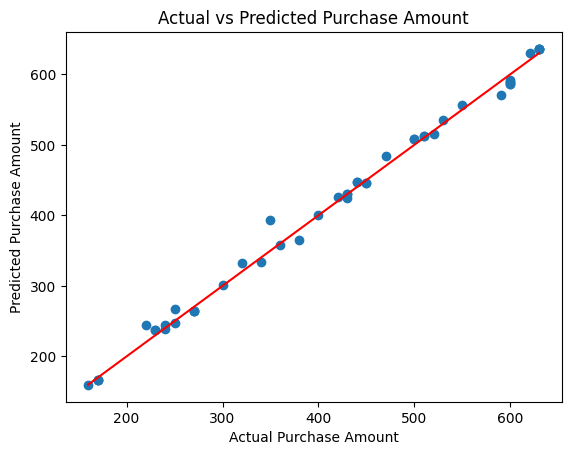

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs Predicted Purchase Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.show()